In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import matplotlib as mpl
import keras

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [12]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100,return_sequences=True, input_shape=[28,28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28,input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28,activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=['accuracy'])

In [14]:
history  = recurrent_ae.fit(X_train, X_train, epochs=5,validation_data=(X_valid,X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 154s 3ms/step - loss: 0.4007 - accuracy: 0.4930 - val_loss: 0.3733 - val_accuracy: 0.4951
Epoch 2/5
55000/55000 [==============================] - 161s 3ms/step - loss: 0.3639 - accuracy: 0.4969 - val_loss: 0.3628 - val_accuracy: 0.4919
Epoch 3/5
55000/55000 [==============================] - 161s 3ms/step - loss: 0.3493 - accuracy: 0.4984 - val_loss: 0.3515 - val_accuracy: 0.4907
Epoch 4/5
55000/55000 [==============================] - 162s 3ms/step - loss: 0.3388 - accuracy: 0.4997 - val_loss: 0.3353 - val_accuracy: 0.4973
Epoch 5/5
55000/55000 [==============================] - 161s 3ms/step - loss: 0.3319 - accuracy: 0.5006 - val_loss: 0.3309 - val_accuracy: 0.4983


In [15]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

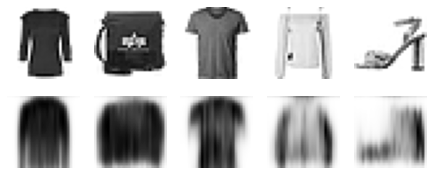

In [16]:
show_reconstructions(recurrent_ae)
plt.show()